## Практическое занятие "Линейные модели. Простая регрессия".

Цель состоит в том, чтобы построить модель, которая прогнозирует продажи на основе затрат на рекламу на различных платформах, таких как телевидение, радио и газеты.

In [46]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [33]:
# чтение данных
data = pd.read_csv("boston_data.csv")
data_test = pd.read_csv("boston_test_data.csv")

### 1.Проверить данные на наличие пропущенных значений.

In [34]:
# your code here
# Проверка на наличие пропущенных значений
missing_values = data.isnull().sum()

# Вывод результатов
print("Пропущенные значения в данных:")
print(missing_values[missing_values > 0])

missing_values = data_test.isnull().sum()

# Вывод результатов
print("Пропущенные значения в данных test:")
print(missing_values[missing_values > 0])

Пропущенные значения в данных:
Series([], dtype: int64)
Пропущенные значения в данных test:
Series([], dtype: int64)


### 2.Проверить данные на наличие дубликатов.

In [35]:
# your code here
# Проверка на наличие дубликатов
duplicates = data.duplicated().sum()

# Вывод результатов
if duplicates > 0:
    print(f"Найдено {duplicates} дубликатов в данных.")
else:
    print("Дубликатов в данных не найдено.")

    duplicates = data_test.duplicated().sum()

# Вывод результатов
if duplicates > 0:
    print(f"Найдено {duplicates} дубликатов в данных.")
else:
    print("Дубликатов в данных не найдено.")

Дубликатов в данных не найдено.
Дубликатов в данных не найдено.


### 3.Проверить данные на наличие выбросов.

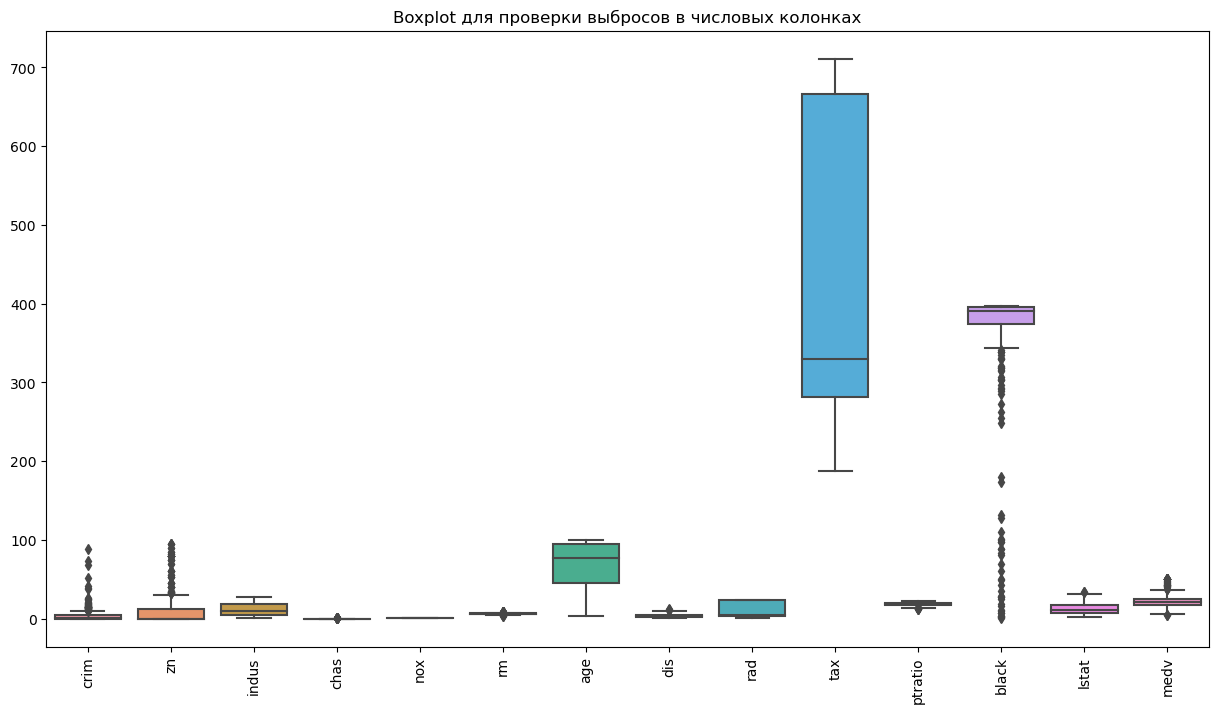

In [36]:
# your code here
# Построение boxplot для всех числовых колонок
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.title("Boxplot для проверки выбросов в числовых колонках")
plt.show()

### 4.Провести разведочный анализ данных. Определить, как продажи связаны с другими признаками.

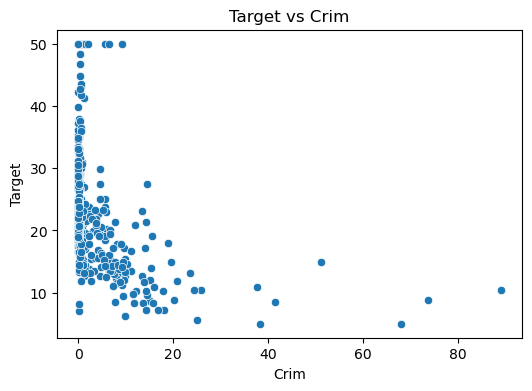

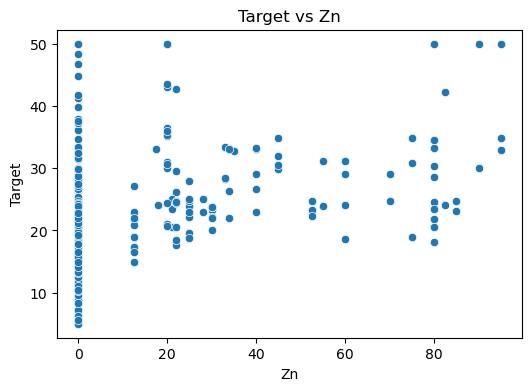

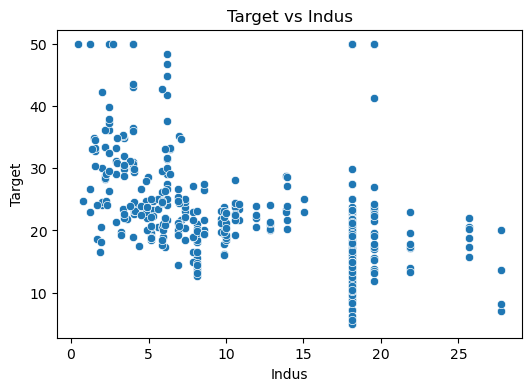

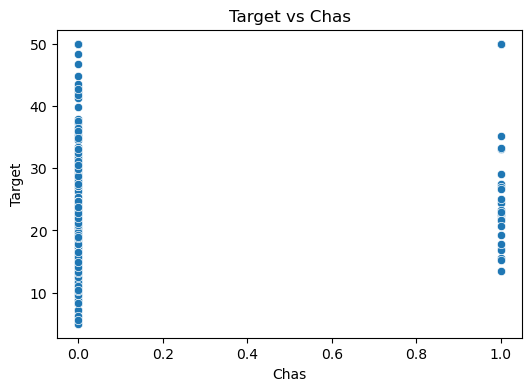

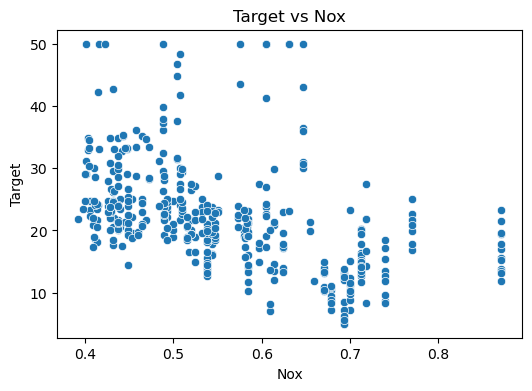

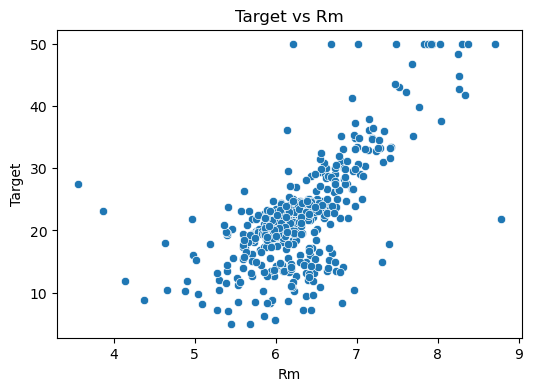

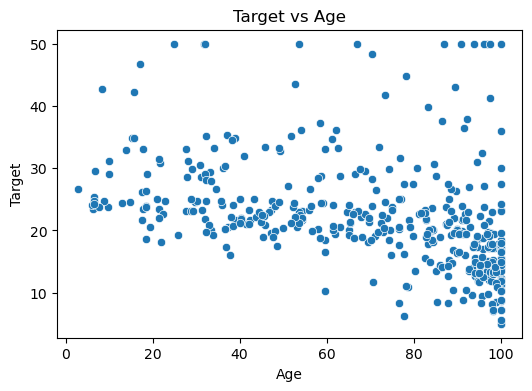

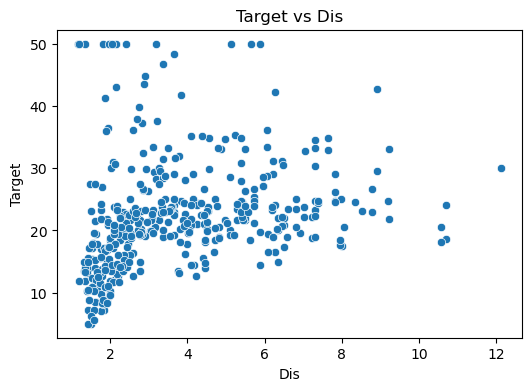

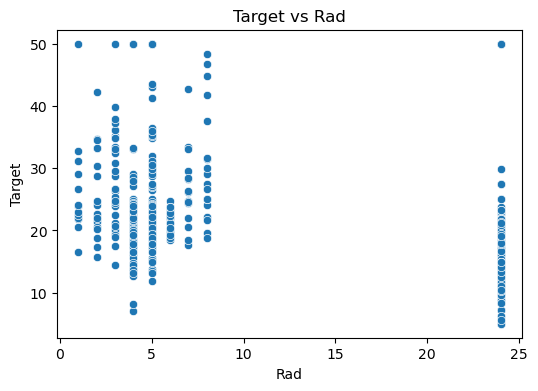

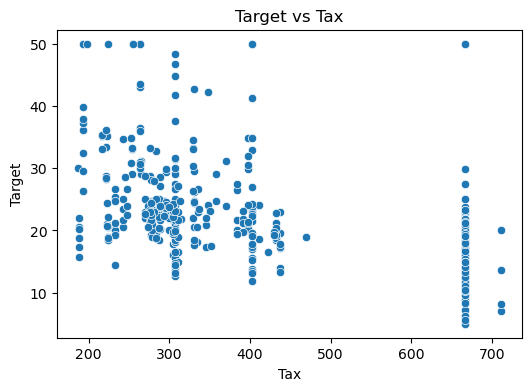

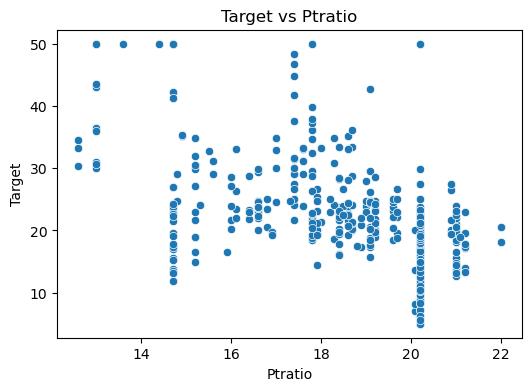

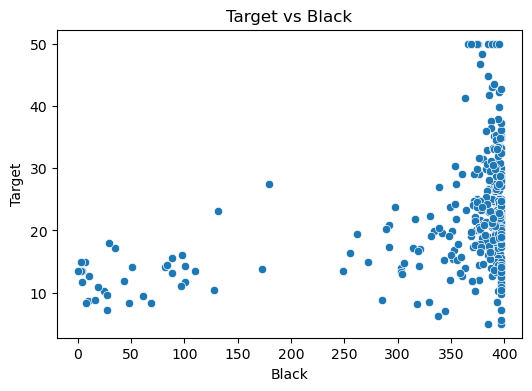

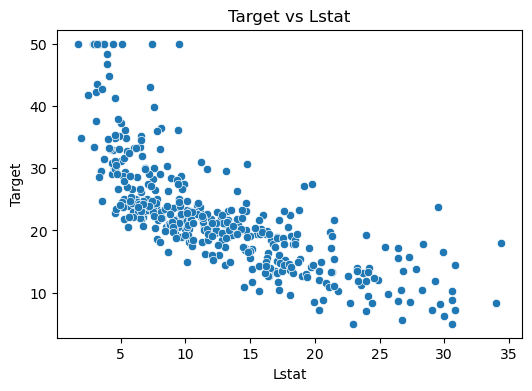

In [37]:

# Примерные независимые переменные
variables = ['crim',  'zn', 'indus',  'chas',  'nox',  'rm',  'age',  'dis',  'rad',  'tax',  'ptratio',  'black',  'lstat']

# Построение scatterplot для каждой переменной
for var in variables:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=var, y='medv', data=data)
    plt.title(f'Target vs {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Target')
    plt.show()

### 5. Построить матрицу корреляций продаж с независимыми признаками.

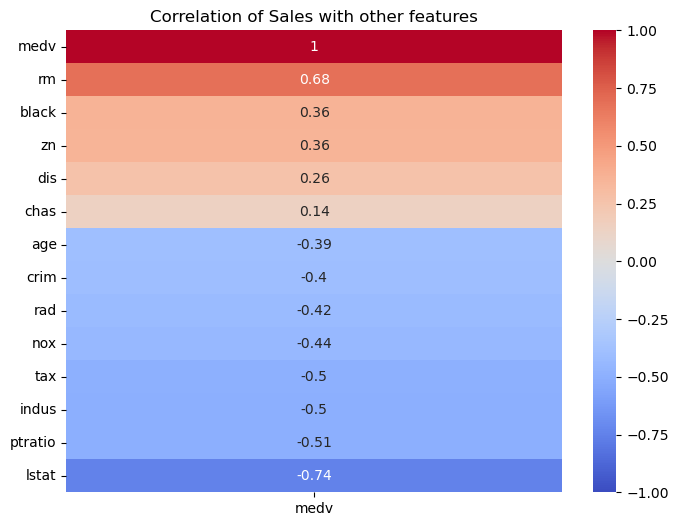

In [38]:


# Вычисляем матрицу корреляций
correlation_matrix = data.corr()

# Извлекаем корреляции только с целевым признаком 'Sales'
sales_correlation = correlation_matrix[['medv']].sort_values(by='medv', ascending=False)

# Визуализируем корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(sales_correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation of Sales with other features")
plt.show()


### 6. Построить и обучить модель линейной регрессии для одной самой сильной независимой переменной (смотреть на коэффициент корреляции). Вывести коэффициенты модели. Построить диаграмму рассеяния для продаж и значений независимой переменной. По уравнению регрессии на диаграмме нарисовать линию, апроксимирующую эти точки. 

Коэффициенты корреляции:
              crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.194770  0.404249 -0.060688  0.405290 -0.172226  0.349288   
zn      -0.194770  1.000000 -0.532268 -0.037290 -0.497114  0.302404 -0.546587   
indus    0.404249 -0.532268  1.000000  0.059928  0.760913 -0.353589  0.630048   
chas    -0.060688 -0.037290  0.059928  1.000000  0.100650  0.090146  0.084852   
nox      0.405290 -0.497114  0.760913  0.100650  1.000000 -0.266114  0.728882   
rm      -0.172226  0.302404 -0.353589  0.090146 -0.266114  1.000000 -0.210589   
age      0.349288 -0.546587  0.630048  0.084852  0.728882 -0.210589  1.000000   
dis     -0.376493  0.659018 -0.702583 -0.103124 -0.762469  0.178700 -0.734915   
rad      0.603044 -0.311313  0.616375 -0.022561  0.612115 -0.173222  0.467341   
tax      0.565047 -0.289332  0.722828 -0.043708  0.660607 -0.241733  0.503830   
ptratio  0.292092 -0.371315  0.356549 -0.121835  0.166715 -0.323330  0.231820   
bl

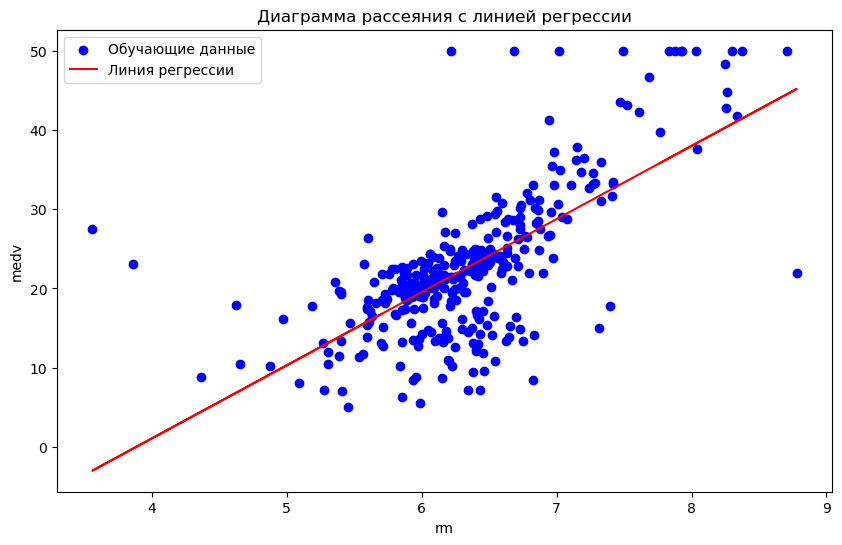

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Вычисление коэффициентов корреляции
correlations = data.corr()
print("Коэффициенты корреляции:\n", correlations)

# Выбираем переменную с наибольшей корреляцией с 'Sales'
most_correlated_feature = correlations['medv'].drop('medv').idxmax()
print(f'Самая сильная независимая переменная: {most_correlated_feature}')

# Разделяем данные на обучающую и тестовую выборки
X = data[[most_correlated_feature]]
y = data['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Вывод коэффициентов модели
print(f'Коэффициент наклона (slope): {model.coef_[0]}')
print(f'Свободный член (intercept): {model.intercept_}')

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Обучающие данные')
plt.plot(X_train, model.predict(X_train), color='red', label='Линия регрессии')
plt.xlabel(most_correlated_feature)
plt.ylabel('medv')
plt.title('Диаграмма рассеяния с линией регрессии')
plt.legend()
plt.show()


### 7. Осуществить предсказания модели на тестовой выборке.

In [40]:
# your code here
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вывод первых 10 предсказанных значений для тестовой выборки
print("Предсказанные значения продаж на тестовой выборке (первые 10):", y_pred[:10])

# Вы также можете оценить качество модели, например, с использованием метрики R^2
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'Коэффициент детерминации R^2 на тестовой выборке: {r2}')

# Оценка модели с использованием MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Средняя абсолютная ошибка (MAE) модели: {mae}')


Предсказанные значения продаж на тестовой выборке (первые 10): [21.01058693 10.39114079 13.96481527 18.72048028 25.23066248 17.17835202
 24.73201022 19.35764705 19.54233307 16.57812245]
Коэффициент детерминации R^2 на тестовой выборке: 0.3564217929163419
Средняя абсолютная ошибка (MAE) модели: 3.9370467063640273


### 8. Рассчитать значения метрик для модели (МАЕ, MSE, RMSE). Какую метрику лучше выбрать?

In [41]:
# your code here
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Расчёт метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Средняя абсолютная ошибка (MAE): {mae}')
print(f'Среднеквадратичная ошибка (MSE): {mse}')
print(f'Корень из среднеквадратичной ошибки (RMSE): {rmse}')


Средняя абсолютная ошибка (MAE): 3.9370467063640273
Среднеквадратичная ошибка (MSE): 30.397892760438683
Корень из среднеквадратичной ошибки (RMSE): 5.513428403492575


### 9. Построить и обучить модель множественной линейной регрессии (включить в модель все признаки). Вывести коэффициенты модели. Осуществить прогноз модели на тестовых данных.

In [42]:
# your code here


# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('medv', axis=1)  # Все признаки, кроме 'Sales'
y = data['medv']

# Разделение данных на обучающую и тестовую выборки
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели множественной линейной регрессии
model = LinearRegression()
model.fit(X_train_pr, y_train_pr)

# Вывод коэффициентов модели
print("Коэффициенты модели:")
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')
print(f'Свободный член (intercept): {model.intercept_}')

# Прогнозирование на тестовых данных
y_pred_pr = model.predict(X_test_pr)

# Вывод первых 10 предсказанных значений для тестовой выборки
print("Предсказанные значения продаж на тестовой выборке (первые 10):", y_pred[:10])

# Оценка модели с использованием MAE
mae = mean_absolute_error(y_test_pr, y_pred_pr)
print(f'Средняя абсолютная ошибка (MAE) модели: {mae}')


Коэффициенты модели:
crim: -0.06699619929406321
zn: 0.04043068171517089
indus: 0.03760108074652629
chas: 2.1343112595350044
nox: -14.892433677426265
rm: 3.7812609377347566
age: 0.01659947550435687
dis: -1.1497950286571716
rad: 0.27812747672272237
tax: -0.012953777546322731
ptratio: -1.0134044018916997
black: 0.008925232688673946
lstat: -0.6100056004735561
Свободный член (intercept): 35.13423771184714
Предсказанные значения продаж на тестовой выборке (первые 10): [21.01058693 10.39114079 13.96481527 18.72048028 25.23066248 17.17835202
 24.73201022 19.35764705 19.54233307 16.57812245]
Средняя абсолютная ошибка (MAE) модели: 3.183885695421891


### 10.  Рассчитать значения метрик для модели (МАЕ, MSE, RMSE). Сравнить значения метрик со значениями метрик для модели простой линейной регрессии (одна независимая переменная). Сделать выводы.

In [44]:

# Расчёт метрик для 1 модели
mae_simple = mean_absolute_error(y_test, y_pred)
mse_simple = mean_squared_error(y_test, y_pred)
rmse_simple = np.sqrt(mse_simple)

print(f'1 модель (Простая линейная регрессия):')
print(f'Средняя абсолютная ошибка (MAE): {mae_simple}')
print(f'Среднеквадратичная ошибка (MSE): {mse_simple}')
print(f'Корень из среднеквадратичной ошибки (RMSE): {rmse_simple}')

# Расчёт метрик для 2 модели
mae_multiple = mean_absolute_error(y_test_pr, y_pred_pr)
mse_multiple = mean_squared_error(y_test_pr, y_pred_pr)
rmse_multiple = np.sqrt(mse_multiple)

print(f'\n2 модель (Множественная линейная регрессия):')
print(f'Средняя абсолютная ошибка (MAE): {mae_multiple}')
print(f'Среднеквадратичная ошибка (MSE): {mse_multiple}')
print(f'Корень из среднеквадратичной ошибки (RMSE): {rmse_multiple}')



1 модель (Простая линейная регрессия):
Средняя абсолютная ошибка (MAE): 3.9370467063640273
Среднеквадратичная ошибка (MSE): 30.397892760438683
Корень из среднеквадратичной ошибки (RMSE): 5.513428403492575

2 модель (Множественная линейная регрессия):
Средняя абсолютная ошибка (MAE): 3.183885695421891
Среднеквадратичная ошибка (MSE): 17.007156820424882
Корень из среднеквадратичной ошибки (RMSE): 4.123973426251057


In [51]:


# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('medv', axis=1)  # Все признаки, кроме целевого
y = data['medv']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_data = data_test[X.columns]  # Используем те же признаки, что и в обучении

# Словарь моделей
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor()
}

# Обучение, предсказания и оценка каждой модели
for name, model in models.items():
    print(f"--- {name} ---")
    
    # Обучение модели
    model.fit(X_train, y_train)
    
    
    # Прогнозирование на тестовых данных
    y_pred = model.predict(X_test)
    y_pred_test = model.predict(X_test_data)
    
    # Оценка модели
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Средняя абсолютная ошибка (MAE): {mae}\n')


--- Linear Regression ---
Средняя абсолютная ошибка (MAE): 3.183885695421891

--- Decision Tree Regressor ---
Средняя абсолютная ошибка (MAE): 3.2876543209876536

--- Random Forest Regressor ---
Средняя абсолютная ошибка (MAE): 2.492913580246914

--- Support Vector Regressor ---
Средняя абсолютная ошибка (MAE): 4.4579541843193

--- K-Nearest Neighbors Regressor ---
Средняя абсолютная ошибка (MAE): 3.616049382716049



In [57]:
X = data.drop('medv', axis=1)  # Все признаки, кроме целевого
y = data['medv']
model = RandomForestRegressor()
model.fit(X_train_pr, y_train_pr)
    
y_pred_test = model.predict(X_test_data)
print(y_pred_test)

print()

data_test['medv'] = y_pred_test
print(data_test)

[35.421 20.938 15.398 23.824 20.978 25.124 20.089 17.626 19.6   46.335
 45.065 10.324 15.145 32.897 30.751 10.483 21.885 19.182 20.964 10.067
 23.233 32.036 12.55  10.24  20.85  21.24  33.826 19.743 18.545 47.921
 23.654 12.007 23.346 19.762 20.521 41.602 26.744 43.977 22.81  14.769
 14.258 48.329 21.004 14.361 31.532 22.047 18.555 21.016 21.259 16.738
 23.358 15.491 20.239 12.673 25.018 22.268 20.14  21.738 19.431 20.116
 43.179 15.936 13.514 19.315 31.47  10.06  19.276 21.202 20.391 14.243
 31.78  21.238 19.153 30.995 18.379 16.031 21.271 20.679 31.339 32.585
 20.023 19.22  28.028 11.199 33.467  8.291 13.364 15.655 20.265 12.365
 20.316 48.641 40.682 18.763 31.632 14.391 36.207 23.334 21.734 17.268
 42.445 46.32 ]

        crim    zn  indus  chas     nox     rm   age     dis  rad    tax  \
0    0.07886  80.0   4.95   0.0  0.4110  7.148  27.7  5.1167  4.0  245.0   
1    0.08873  21.0   5.64   0.0  0.4390  5.963  45.7  6.8147  4.0  243.0   
2    1.38799   0.0   8.14   0.0  0.5380  5.95